<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [3]:
pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.5
    Uninstalling aiohttp-3.9.5:
      Successfully uninstalled aiohttp-3.9.5


In [4]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTYzOTUzMzcsImV4cCI6MTcxNjQyNDI1NywibmJmIjoxNzE2Mzk1MzM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVRoMUo5UzE1ZmxOaWJkdU5hNHI3bmNXNENic2Q1OUpCQVdJNHVDMkNGRVp6ZzBJNmxlRHdWT0dvRHRwTVlpRkFlU1h3UFBmLTBLeEl1UUQ5RGVTN0ZzM0F5S19ic2lDWlhYc2lHTEV3UWRmQUw0ND0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.xKhc8ITo4gcFm-wR18GskF2rhfrCXuj4IcM38ZpWi4Y"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY0ODI3NjUsImV4cCI6MTcxNjUxMDYwNSwibmJmIjoxNzE2NDgyNzY1LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVQzTE5ydkZlZUN2bVBPc1dIOFc3VmdPVHVsZFE0cTVzNVkwTkZwdlJBOW1pVWpxaE1TRTJrdXVtWUd1ZFNzVmZ1UlBkdW1TZnFqSk5hdEFFR0FVdDR3SGZJb2pka3BvN1VWLTJob2w5bnEzTzktVT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.SdE2jvKJzWzBBL3Syd5dOb3OOTCdfX200YCOYpDQ7mg"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY2NDUwNDAsImV4cCI6MTcxNjY4MzQ0MCwibmJmIjoxNzE2NjQ1MDQwLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVVleXdaRmZ2azZiNE45aEFjQ1diaktvZlBzMjdsT25SYUZSZ0tEZTltMVNFVWQzOEJLeVpZLU4yVThQOTc3aDJCMzhCT1UyTFZMRzdESDVaZDVhNkF5RTBZOXRnREk5UmVZUXJnX2FnTnFqV2xCTT0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.nRdj7mirn1GyfHi76dKsLeTOCeFO-kDXCBr1UNvJ11w"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTY4MjM4MzcsImV4cCI6MTcxNjg1NjIzNywibmJmIjoxNzE2ODIzODM3LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVZLY2RKRWlJZU4zM21VM2picmpWUGE4a25hVzdhNm55akphNzNnVzNnWWdvLUxrTDkwbnJ1S0ZRUml2Zmdnd0JWdmxuVzhBek9WVnlZT2hEcXhMUmsyVUIyQThTdmdTcHJsaU9MdUxreUtnWlJGcz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.osdu8vvA9G-u6q7thuckcrcM1mlobEsO11jeJ-CboUU"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk0NTMsImV4cCI6MTcxNzExNTQ1MywibmJmIjoxNzE3MDc5NDUzLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJMmR2ZzVUMWdHN3Y2MWQxREZ6NVdnY2N5RVJDTWFvb1MwUWhQR2sxeVdXemliT09yOG1KcWRkZ1p4MUVocFVXUGZ1WWFhTEVkaU9kLW9YOGpDSWhUYmYweDNaNU9IZWpBYUEwTUFzU0RqOUZrcz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOm51bGwsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.bG80faOjboOpVA10781e7mHw7D5qH0P9t3kQlC_TZfs"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
daily_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2024-03-01",
    "range_to":"2024-05-29",
    "cont_flag":"1"
}

response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


#hourly data Extraction
hourly_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"60",
    "date_format":"1",
    "range_from":"2024-03-01",
    "range_to":"2024-05-29",
    "cont_flag":"1"
}

response = fyers.history(data=hourly_data)
print(response)
hourly_data_json = json.dumps(response)
hourly_data_df = json.loads(hourly_data_json)
print(hourly_data_df['candles'])
pricing_hourly_data = hourly_data_df['candles']
hourly_df = pd.DataFrame(pricing_hourly_data)
hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(hourly_df)


{'candles': [[1709251200, 752, 772, 751.95, 769.15, 17348526], [1709337600, 771.95, 777, 768.9, 773.3, 1158960], [1709510400, 774.4, 777, 769, 772.05, 9789141], [1709596800, 769.5, 786.95, 769.1, 783.95, 18088847], [1709683200, 783.65, 790.3, 772.9, 783.9, 26710525], [1709769600, 790, 793.4, 783, 788.05, 15497868], [1710115200, 790, 792.8, 770.55, 773.7, 16778340], [1710201600, 770, 777.75, 757.35, 759.7, 21529705], [1710288000, 758.65, 763.7, 743, 747.25, 27950252], [1710374400, 749.9, 750.8, 734.05, 741.05, 19730882], [1710460800, 739.25, 746.55, 723, 731.9, 29792241], [1710720000, 727.1, 737.9, 722.1, 730.95, 18145126], [1710806400, 730, 734.35, 721.15, 723.8, 15205043], [1710892800, 725.15, 738.95, 719.8, 736.25, 25405455], [1710979200, 742, 750.6, 740.55, 744.3, 15161161], [1711065600, 743.85, 748.8, 741.4, 746.7, 15535921], [1711411200, 743.05, 747.85, 738.5, 740.05, 14678342], [1711497600, 743, 745.85, 730.2, 733.3, 30088789], [1711584000, 737.75, 759.55, 736.9, 752.35, 21705116

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [6]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

####### Daily MACD calculations ######
# Calculate the 12-period EMA Daily
daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Daily
daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

####### Daily RSI calculations ######

delta = daily_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
daily_df['DAILY_RSI'] = 100 - (100 / (1 + RS))


####### Hourly MACD calculations ######
# Calculate the 12-period EMA Daily
hourly_df['HOURLY_EMA12'] = hourly_df['close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-period EMA Daily
hourly_df['HOURLY_EMA26'] = hourly_df['close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
hourly_df['HOURLY_MACD'] = hourly_df['HOURLY_EMA12'] - hourly_df['HOURLY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
hourly_df['HOURLY_SIGNAL'] = hourly_df['HOURLY_MACD'].ewm(span=9, adjust=False).mean()

####### Hourly RSI calculations ######

delta = hourly_df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
hourly_df['HOURLY_RSI'] = 100 - (100 / (1 + RS))


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
hourly_df.dropna(inplace=True)

print(hourly_df)

          epoch    open    high     low   close   volume        date  \
13   1709534700  772.25  774.90  772.00  772.80  1090513  2024-03-04   
14   1709538300  772.85  774.30  772.50  773.95   874443  2024-03-04   
15   1709541900  773.95  774.45  769.50  772.05  2240291  2024-03-04   
16   1709545500  772.30  772.60  770.65  771.35   927915  2024-03-04   
17   1709610300  769.50  781.40  769.10  779.80  3265813  2024-03-05   
..          ...     ...     ...     ...     ...      ...         ...   
400  1716961500  823.45  827.90  822.50  825.30  1808211  2024-05-29   
401  1716965100  825.45  827.50  825.00  826.85   921354  2024-05-29   
402  1716968700  826.95  828.00  823.35  824.50  2045101  2024-05-29   
403  1716972300  824.85  825.50  819.30  823.75  3589615  2024-05-29   
404  1716975900  823.75  825.90  822.50  825.00  1337591  2024-05-29   

     HOURLY_EMA12  HOURLY_EMA26  HOURLY_MACD  HOURLY_SIGNAL  HOURLY_RSI  
13     769.522210    765.188164     4.334046       3.564488  

In [7]:
## Aggregate hourly data into daily

# Define the aggregation functions for each feature
aggregation_functions = {
    'close': ['mean', 'max', 'min'],
    'volume': ['sum'],
    'HOURLY_RSI': ['mean', 'max', 'min'],
    'HOURLY_MACD': ['mean', 'max', 'min']
}

# Convert the 'date' column to a DatetimeIndex
hourly_df['date'] = pd.to_datetime(hourly_df['date'])

# Resample the hourly data to daily data
daily_aggregated = hourly_df.resample('D', on='date').agg(aggregation_functions)

# Flatten the column hierarchy
daily_aggregated.columns = ['_'.join(col).strip() for col in daily_aggregated.columns.values]
daily_aggregated.reset_index(inplace=True)

In [8]:
print(daily_aggregated)


         date  close_mean  close_max  close_min  volume_sum  HOURLY_RSI_mean  \
0  2024-03-04  772.537500     773.95     771.35     5133162        80.312478   
1  2024-03-05  782.828571     786.20     779.80    18084626        74.413335   
2  2024-03-06  784.507143     786.85     778.90    26705378        67.325834   
3  2024-03-07  787.914286     789.95     785.85    15493121        57.562602   
4  2024-03-08         NaN        NaN        NaN           0              NaN   
..        ...         ...        ...        ...         ...              ...   
82 2024-05-25         NaN        NaN        NaN           0              NaN   
83 2024-05-26         NaN        NaN        NaN           0              NaN   
84 2024-05-27  833.285714     836.70     827.40    12290852        54.115126   
85 2024-05-28  832.335714     834.60     830.25    13816932        48.480462   
86 2024-05-29  824.921429     826.85     823.45    14517303        33.615813   

    HOURLY_RSI_max  HOURLY_RSI_min  HOU

In [9]:
# Merge the daily data with the aggregated hourly data
# Convert the 'date' column in daily_aggregated to datetime64[ns]
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_aggregated['date'] = pd.to_datetime(daily_aggregated['date'])

# Merge the daily data with the aggregated hourly data
combined_df = pd.merge(daily_df, daily_aggregated, left_on='date', right_on='date', how='inner')

# Drop the 'Datetime' column if it exists
if 'Datetime' in combined_df.columns:
    combined_df.drop(columns=['Datetime'], inplace=True)

# Print the combined DataFrame
print(combined_df)

         epoch    open    high     low   close    volume       date  \
0   1710892800  725.15  738.95  719.80  736.25  25405455 2024-03-20   
1   1710979200  742.00  750.60  740.55  744.30  15161161 2024-03-21   
2   1711065600  743.85  748.80  741.40  746.70  15535921 2024-03-22   
3   1711411200  743.05  747.85  738.50  740.05  14678342 2024-03-26   
4   1711497600  743.00  745.85  730.20  733.30  30088789 2024-03-27   
5   1711584000  737.75  759.55  736.90  752.35  21705116 2024-03-28   
6   1711929600  759.05  761.50  752.10  758.30   9949971 2024-04-01   
7   1712016000  758.20  768.75  753.35  766.40  15713063 2024-04-02   
8   1712102400  764.90  772.60  760.15  771.05  19136981 2024-04-03   
9   1712188800  775.00  775.30  758.10  759.30  15889530 2024-04-04   
10  1712275200  757.95  767.70  752.60  764.75   9939620 2024-04-05   
11  1712534400  766.05  770.00  761.80  768.30   9797174 2024-04-08   
12  1712620800  768.45  772.45  761.10  764.20   7465892 2024-04-09   
13  17

In [10]:
# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_MACD_mean', 'HOURLY_RSI_mean', 'volume_sum' ]])
print(scaled_data)

[[0.02938247 0.         0.15321352 0.11978717 0.50579563 0.06961696
  0.43798675 0.50600263]
 [0.10956175 0.0144389  0.25757108 0.07715383 0.29382923 0.40051917
  0.73932228 0.2938654 ]
 [0.13346614 0.03653875 0.23625235 0.04878242 0.30158345 0.48281762
  0.6725594  0.3016236 ]
 [0.06723108 0.0382738  0.19846182 0.02653557 0.28383914 0.39070752
  0.24414616 0.28394586]
 [0.         0.02374518 0.         0.00496767 0.60269927 0.30594422
  0.08912284 0.60296014]
 [0.18974104 0.07108966 0.23583549 0.         0.42923129 0.38330883
  0.58910769 0.42869218]
 [0.24900398 0.12856869 0.25439847 0.01094257 0.18600362 0.54485281
  0.64994045 0.18596227]
 [0.32968127 0.199537   0.43574255 0.03811403 0.30524872 0.57348703
  0.60826408 0.30531341]
 [0.37599602 0.2703096  0.60537846 0.0782178  0.37609358 0.60903055
  0.69908948 0.37624301]
 [0.25896414 0.29279771 0.61267149 0.11613683 0.30890003 0.4950266
  0.38027743 0.30890278]
 [0.31324701 0.32683296 0.72423826 0.15530475 0.18578945 0.36573166
  0

In [11]:
print(scaled_data.shape)

(46, 8)


In [12]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 30  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.6 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
#print(X)
#print("------")
#print(y)
# print(len(scaled_data))
# print(scaled_data.shape)
# print(len(combined_df))
# print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9, 30, 8)
(9,)
(7, 30, 8)
(7,)


In [30]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [14]:
print(X_train.shape)

(9, 30, 8)


In [15]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 0.8040 - val_loss: 0.6514
Epoch 2/20
1/1 [==============================] - 0s 62ms/step - loss: 0.6351 - val_loss: 0.4346
Epoch 3/20
1/1 [==============================] - 0s 80ms/step - loss: 0.3735 - val_loss: 0.2589
Epoch 4/20
1/1 [==============================] - 0s 70ms/step - loss: 0.2389 - val_loss: 0.1232
Epoch 5/20
1/1 [==============================] - 0s 65ms/step - loss: 0.0868 - val_loss: 0.0352
Epoch 6/20
1/1 [==============================] - 0s 65ms/step - loss: 0.0426 - val_loss: 0.0026
Epoch 7/20
1/1 [==============================] - 0s 67ms/step - loss: 0.0240 - val_loss: 0.0293
Epoch 8/20
1/1 [==============================] - 0s 66ms/step - loss: 0.0474 - val_loss: 0.0716
Epoch 9/20
1/1 [==============================] - 0s 68ms/step - loss: 0.1166 - val_loss: 0.0810
Epoch 10/20
1/1 [==============================] - 0s 65ms/step - loss: 0.1018 - val_loss: 0.0637
Epoch 11/20
1/1 [==============

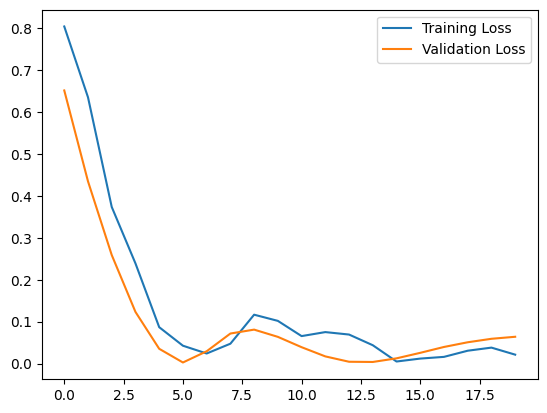

1/1 [==============================] - 1s 936ms/step


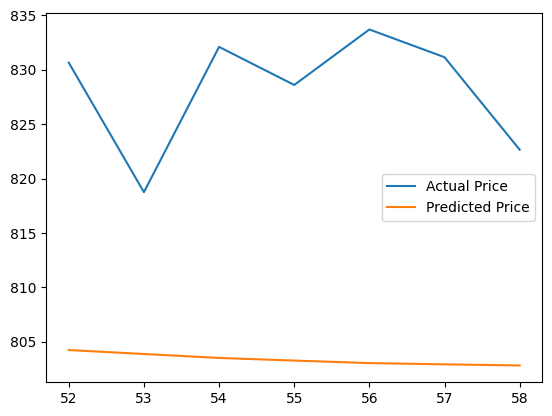

[804.23784761 803.87379832 803.51131094 803.26904826 803.0378386
 802.92240732 802.81828637]


In [16]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]

# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()

print(predicted_prices)
